<a href="https://colab.research.google.com/github/zyberg2091/News-headline-prediction-/blob/master/News_headline_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
news_file=list(os.listdir('/content/drive/My Drive/Data/News Data'))
news_file

['13th_sept.txt',
 '12th_sept.txt',
 '11th_sept.txt',
 '10th_sept.txt',
 '09th_sept.txt',
 '08th_sept.txt',
 '07th_sept.txt',
 '06th_sept.txt',
 '05th_sept.txt']

In [ ]:
from pathlib import Path
path=Path('/content/drive/My Drive/Data/News Data')

In [ ]:
import json
news=[]
for data in news_file:
  with open(path / data,'r') as f:
     file=json.load(f)
  news.append(file)

In [ ]:
news[0]

{'articles': [{'author': 'Amy Tennery',
   'content': 'NEW YORK (Reuters) - The U.S. Open finishes on Sunday having largely pulled off what was once seen as impossible: hosting an international sports mega-event amid the COVID-19 outbreak.\r\nFILE PHOTO: S… [+2778 chars]',
   'description': 'The U.S. Open finishes on Sunday having largely pulled off what was once seen as impossible: hosting an international sports mega-event amid the COVID-19 outbreak.',
   'publishedAt': '2020-09-13T20:13:00Z',
   'source': {'id': 'reuters', 'name': 'Reuters'},
   'title': "U.S. Open offers glimpse of tennis' future in pandemic era - Reuters",
   'url': 'https://www.reuters.com/article/us-tennis-usopen-future-idUSKBN2640VS',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20200913&t=2&i=1533263875&r=LYNXMPEG8C0KV&w=800'},
  {'author': 'Elaine Lies, Chris Gallagher',
   'content': 'YUZAWA, Japan (Reuters) - As a boy, friends say, Yoshihide Suga - poised to be Japans next leader - sledd

In [ ]:
x_data=[]
y_data=[]
x=[]
y=[]
for info in news:
  for val in info['articles']:
    x.append(val['description'])
    y.append(val['title'])

  x_data.append(x)
  y_data.append(y)
  x=[]
  y=[]


In [ ]:
len(x_data[1]),len(y_data[1])

(20, 20)

In [ ]:
x_data[0]

['The U.S. Open finishes on Sunday having largely pulled off what was once seen as impossible: hosting an international sports mega-event amid the COVID-19 outbreak.',
 "As a boy, friends say, Yoshihide Suga - poised to be Japan's next leader - sledded down mountains in winter, ran track and field and was an avid baseball player. But his skills didn't extend as far as acting.",
 'Several teams stayed in the locker room for the pregame playing of the national anthem, while some players knelt during it or wore decals and shirts against hate and racism.',
 'There won’t be a New York City Marathon this year, but we can celebrate the anniversary of the first one, held on Sept. 13, 1970.',
 "<ol><li>Tuscan GP: Lewis Hamilton wins chaotic race amid crashes, red flags  Sky Sports\r\n</li><li>Tuscan Grand Prix: Lewis Hamilton claims 90th win after incredible race  BBC Sport\r\n</li><li>'Hell of a day': Lewis Hamilton claims first Tuscan Grand Prix after…",
 "Lowe's late HR leads Rays over Red S

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x_data=np.array(x_data)
y_data=np.array(y_data)
x_data.shape,y_data.shape

((9, 20), (9, 20))

In [ ]:
x_data=np.array(x_data).reshape(180)
y_data=np.array(y_data).reshape(180)

In [ ]:
["{} : {}".format(i,j) for i,j in zip(x_data[0].split(),y_data[0].split())]  #example

['The : U.S.',
 'U.S. : Open',
 'Open : offers',
 'finishes : glimpse',
 'on : of',
 "Sunday : tennis'",
 'having : future',
 'largely : in',
 'pulled : pandemic',
 'off : era',
 'what : -',
 'was : Reuters']

In [ ]:
#cleaning
import re


def clean_data(text):
    emoji_pattern=re.compile("["                            
        u"\U0001F300-\U0001F5FF"                             # symbols & pictographs
        u"\U0001F680-\U0001F6FF"                             # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"                             # flags (iOS)
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'',text)

In [ ]:
x=[clean_data(str(i)) for i in x_data]
y=[clean_data(str(i)) for i in y_data]
type(x)

list

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')



In [ ]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
x[:10],y[:10]

(['The U.S. Open finishes on Sunday having largely pulled off what was once seen as impossible: hosting an international sports mega-event amid the COVID-19 outbreak.',
  "As a boy, friends say, Yoshihide Suga - poised to be Japan's next leader - sledded down mountains in winter, ran track and field and was an avid baseball player. But his skills didn't extend as far as acting.",
  'Several teams stayed in the locker room for the pregame playing of the national anthem, while some players knelt during it or wore decals and shirts against hate and racism.',
  'There won’t be a New York City Marathon this year, but we can celebrate the anniversary of the first one, held on Sept. 13, 1970.',
  "<ol><li>Tuscan GP: Lewis Hamilton wins chaotic race amid crashes, red flags  Sky Sports\r\n</li><li>Tuscan Grand Prix: Lewis Hamilton claims 90th win after incredible race  BBC Sport\r\n</li><li>'Hell of a day': Lewis Hamilton claims first Tuscan Grand Prix after…",
  "Lowe's late HR leads Rays over

In [ ]:
def clean_data_2(data):
  data=re.sub(r'https?://\S+|www\.\S+',' ',data) #hyperlinks
  data=re.sub(r'[^a-zA-Z]',' ',data)
  data=data.replace('li',' ')
  data=data.replace('ol',' ')
  words=[i for i in data.split() if i not in list(stopwords)]
  data=' '.join(words)
  data=data.lower()
  return data
  

In [ ]:
x=[clean_data_2(str(i)) for i in x]
y=[clean_data_2(str(i)) for i in y]

In [ ]:
x

['the u s open finishes sunday largely pulled seen impossible hosting international sports mega event amid covid outbreak',
 'as boy friends say yoshihide suga poised japan next leader sledded mountains winter ran track field avid baseball player but skills extend far acting',
 'several teams stayed locker room pregame playing national anthem players knelt wore decals shirts hate racism',
 'there new york city marathon year celebrate anniversary first one held sept',
 'tuscan gp lewis hamilton wins chaotic race amid crashes red flags sky sports tuscan grand prix lewis hamilton claims th win incredible race bbc sport hell day lewis hamilton claims first tuscan grand prix',
 'lowe late hr leads rays red sox reuters',
 'are professional sports leagues prepared adapt adjust health hazards brought wildfires',
 'it long since la liga season wrapped season already underway we got first derby match opening weekend valencia play host local rivals levante derby del turia don miss moment',
 'capp

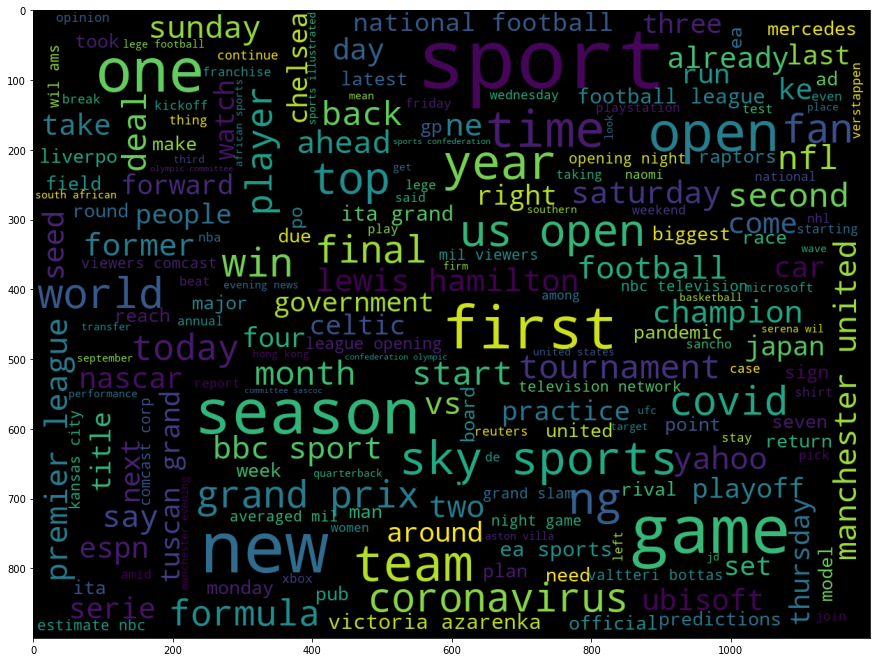

In [ ]:
from wordcloud import WordCloud

word_cloud=WordCloud(width=400,height=300,max_words = 200,
                     stopwords = stopwords,
                     background_color='black',max_font_size = 40,
                     scale = 3).generate(str(x))


fig=plt.figure(figsize=(15,10))
title='cloud'

fig.suptitle(title, fontsize = 20)
fig.subplots_adjust(top = 2.25)
plt.imshow(word_cloud)
plt.show()

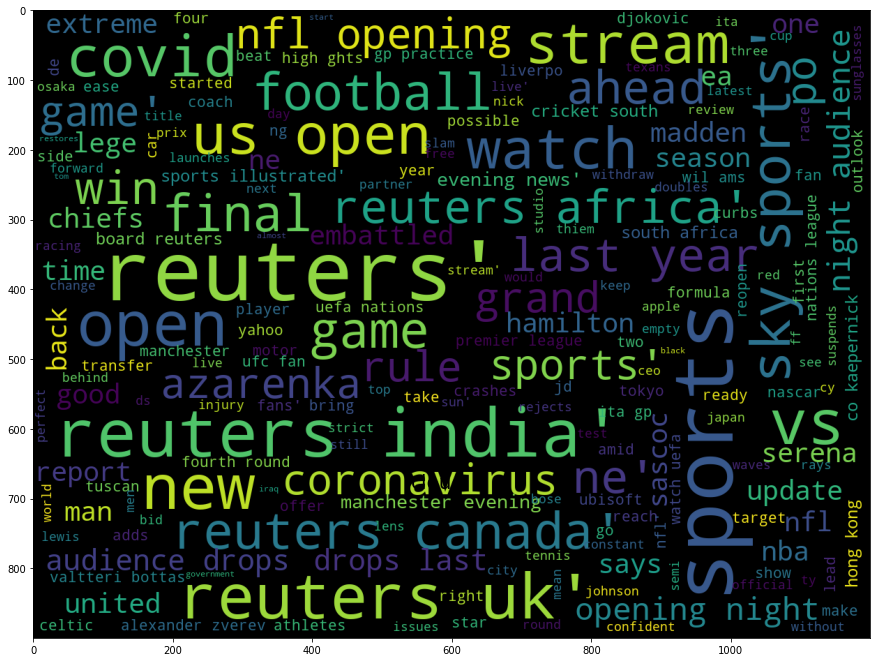

In [ ]:
word_cloud=WordCloud(width=400,height=300,max_words = 200,
                     stopwords = stopwords,
                     background_color='black',max_font_size = 40,
                     scale = 3).generate(str(y))


fig=plt.figure(figsize=(15,10))
title='cloud'

fig.suptitle(title, fontsize = 20)
fig.subplots_adjust(top = 2.25)
plt.imshow(word_cloud)
plt.show()

In [ ]:
#frequency of unique words train data
def freqdict(data):
  freq={}
  for xy_data in data:
    for word in xy_data.split():
      if word not in list(freq.keys()):
        freq[word]=1
      else:
        freq[word]+=1
   
  return freq


In [ ]:
x_freq=freqdict(x)
y_freq=freqdict(y)

In [ ]:
max_frequency=max([values for values in x_freq.values()])
word=[i for i,k in x_freq.items() if k==max_frequency]
word                                                         #obvious word==sports because news artilces are related about sports

['sports']

In [ ]:
import random
x_val=list(x_freq.keys())
y_val=list(y_freq.keys())
random.shuffle(x_val)
random.shuffle(y_val)

In [ ]:
x_val[:5]

['confirmed', 'spikes', 'korea', 'main', 'au']

In [ ]:
import random


x_word_index={word:i+2 for i,word in enumerate(x_val)}
y_word_index={word:i+2 for i,word in enumerate(y_val)}

x_word_index['<OOV>'],y_word_index['<OOV>']=1,1
x_word_index['<PAD>'],y_word_index['<PAD>']=0,0
x_vocab_len=len(x_word_index)
y_vocab_len=len(y_word_index)


In [ ]:
[(word,values) for i,(word,values) in zip(range(100),x_word_index.items()) if i<100]

[('confirmed', 2),
 ('spikes', 3),
 ('korea', 4),
 ('main', 5),
 ('au', 6),
 ('acc', 7),
 ('ks', 8),
 ('remote', 9),
 ('nations', 10),
 ('developers', 11),
 ('classrooms', 12),
 ('rated', 13),
 ('hot', 14),
 ('closed', 15),
 ('russ', 16),
 ('dash', 17),
 ('returned', 18),
 ('jd', 19),
 ('beaches', 20),
 ('matchups', 21),
 ('alphatauri', 22),
 ('chrysler', 23),
 ('capital', 24),
 ('norris', 25),
 ('yet', 26),
 ('refined', 27),
 ('lehner', 28),
 ('swir', 29),
 ('and', 30),
 ('start', 31),
 ('athletes', 32),
 ('injustice', 33),
 ('clowney', 34),
 ('hopefully', 35),
 ('career', 36),
 ('automobiles', 37),
 ('watch', 38),
 ('mayor', 39),
 ('suitors', 40),
 ('nhl', 41),
 ('meeting', 42),
 ('nottinghamshire', 43),
 ('baltimore', 44),
 ('what', 45),
 ('soccer', 46),
 ('covered', 47),
 ('knights', 48),
 ('korda', 49),
 ('tube', 50),
 ('frames', 51),
 ('north', 52),
 ('revives', 53),
 ('celebrate', 54),
 ('honoured', 55),
 ('lege', 56),
 ('risk', 57),
 ('increase', 58),
 ('dustin', 59),
 ('parisi

In [ ]:
def word2index_x(text):
  return [x_word_index[word] if word is not '<OOV>' else x_word_index['<OOV>'] for word in text.split()]

def word2index_y(text):
  return [y_word_index[word] if word is not '<OOV>' else y_word_index['<OOV>'] for word in text.split()]


In [ ]:
x_word_index['<OOV>']

1

In [ ]:
#encoding
x_data=[word2index_x(text) for text in x]
y_data=[word2index_y(text) for text in y]



In [ ]:
#padding
def padding(data,padlen):
   
   counter=0
   data_val,data_pad=[],[]
   for d in data:
      for i in range(padlen):
         if counter<len(d):
            data_val.append(d[i])
         else:
            data_val.append(x_word_index['<PAD>'])
         counter+=1
      data_pad.append(data_val)
      counter=0
      data_val=[]
   return data_pad
    

In [ ]:
padlen=max([len(x) for x in x_data])
x_data_pad=padding(x_data,padlen)
padlen=max([len(y) for y in y_data])
y_data_pad=padding(y_data,padlen)


In [ ]:
x_data_pad=np.array(x_data_pad)
x_data_pad.shape

(180, 35)

In [ ]:
x_vocab_len

1997

In [ ]:
x_data_pad=np.array(x_data_pad)
y_data_pad=np.array(y_data_pad)

In [ ]:
#pre-trained embeddings

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt

--2020-10-07 18:46:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  84.7MB/s    in 4.2s    

2020-10-07 18:46:49 (78.6 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [ ]:
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

In [ ]:
x_embeddings_matrix = np.zeros((x_vocab_len, 100));
for word, i in x_word_index.items():
    x_embedding_vector = embeddings_index.get(word);
    if x_embedding_vector is not None:
        x_embeddings_matrix[i] = x_embedding_vector;



In [ ]:
a=embeddings_index.get('<oov>')
print(a)

None


In [ ]:
x_embeddings_matrix.shape

(1997, 100)

In [ ]:
y_embeddings_matrix = np.zeros((y_vocab_len, 100));
for word, i in y_word_index.items():
    y_embedding_vector = embeddings_index.get(word);
    if y_embedding_vector is not None:
        y_embeddings_matrix[i] = y_embedding_vector;

In [ ]:
y_vocab_len

965

In [ ]:
y_embeddings_matrix.shape

(965, 100)

In [ ]:
# model development
# lets try encoder-decoder model with bilstm model

import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Bidirectional,LSTM,SpatialDropout1D,Embedding,TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,RMSprop



In [ ]:
x_data_pad.shape,y_data_pad.shape

((180, 35), (180, 18))

In [ ]:
x_data_pad[:2],y_data_pad[:2]

(array([[  97, 1011, 1180,  292,  872,  218,   88,  276,  543,  467,  500,
          255, 1739,  629, 1688, 1043,  151,  413,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0],
        [1460, 1469,  581, 1637, 1497, 1801, 1568,  484, 1514,  725,   94,
          704, 1788,   70, 1961,  541, 1933, 1585, 1172,  239,  219, 1418,
         1804, 1984,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]]),
 array([[521, 808, 806, 893, 620, 265, 116, 576, 704, 220, 775,   0,   0,
           0,   0,   0,   0,   0],
        [288, 150, 226, 719,  39, 818, 543, 409, 720, 775,   0,   0,   0,
           0,   0,   0,   0,   0]]))

In [ ]:
units=512
#Encoder
encoder_inputs=Input(shape=(x_data_pad.shape[1],))
encoder_embedding=Embedding(x_vocab_len,100,weights=[x_embeddings_matrix],trainable=False)(encoder_inputs)
Lstm=Bidirectional(LSTM(units,return_sequences=True,return_state=True))
encoder_out, forward_h_en, forward_c_en, backward_h_en, backward_c_en=Lstm(encoder_embedding)
encoder_states=[forward_h_en, forward_c_en, backward_h_en, backward_c_en]

#decoder
decoder_inputs=Input(shape=(y_data_pad.shape[1],))
decoder_embedding=Embedding(y_vocab_len,100,weights=[y_embeddings_matrix],trainable=False)(decoder_inputs)
decoder_lstm_units=Bidirectional(LSTM(units,return_sequences=True,return_state=True))
decoder_out, forward_h_dec, forward_c_dec, backward_h_dec, backward_c_dec=decoder_lstm_units(decoder_embedding,initial_state=encoder_states)

dense=TimeDistributed(Dense(y_vocab_len,activation='softmax'))
outputs=dense(decoder_out)





model=Model(inputs=[encoder_inputs,decoder_inputs],outputs=outputs)

model.summary()



Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 18)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 100)      199700      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 18, 100)      96500       input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
from tensorflow.keras.utils import to_categorical
y_data_pad_2=[to_categorical(i,num_classes=y_vocab_len) for i in y_data_pad]
y_data_pad_2=np.array(y_data_pad_2)

In [ ]:
y_data_pad_2.shape

(180, 18, 965)

In [ ]:
np.array(model.layers[5].get_weights()).shape


(6,)

In [ ]:
x_data_pad.shape

(180, 35)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
r=model.fit([x_data_pad[:150],y_data_pad[:150]],y_data_pad_2[:150],validation_data=([x_data_pad[150:],y_data_pad[150:]],y_data_pad_2[150:]),epochs=30,verbose=1)

Epoch 1/30
5/5 [==============================] - 7s 1s/step - loss: 5.6759 - acc: 0.3630 - val_loss: 3.6952 - val_acc: 0.4741
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 3.8425 - acc: 0.4574 - val_loss: 3.6861 - val_acc: 0.4741
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 3.6320 - acc: 0.4548 - val_loss: 3.8058 - val_acc: 0.4981
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 3.4610 - acc: 0.4807 - val_loss: 3.7692 - val_acc: 0.5259
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 3.2816 - acc: 0.4963 - val_loss: 3.8476 - val_acc: 0.5296
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 3.0937 - acc: 0.5070 - val_loss: 3.8599 - val_acc: 0.5296
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 2.8858 - acc: 0.5178 - val_loss: 3.9144 - val_acc: 0.5444
Epoch 8/30
5/5 [==============================] - 6s 1s/step - loss: 2.6263 - acc: 0.5474 - val_loss: 3.9088 - 

In [ ]:
pred=model.predict([x_data_pad[-8:],y_data_pad[-8:]]).argmax(axis=-1)

In [ ]:
pred.shape

(8, 18)

In [ ]:
pred

array([[639, 687, 687, 718, 963, 963, 806, 806,  59,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [637, 620, 620, 235, 717, 514, 375, 375, 775, 739,   0,   0,   0,
          0,   0,   0,   0,   0],
       [963, 639, 963, 806, 806, 414,  28, 433,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [ 56, 812, 920, 131, 818, 290, 769, 775,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [268, 282, 535, 759, 922, 534, 775, 775,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [847, 702, 299, 391, 637, 126,  16, 732, 353, 830,   0,   0,   0,
          0,   0,   0,   0,   0],
       [637, 543, 543, 180, 335,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [754, 127, 913, 127, 127, 828, 775, 739,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0]])

In [ ]:
index2word={value:key for key,value in y_word_index.items()}
def index2words(logits,index2word):
  return [index2word[i] for i in logits]


# Ineffcient predictions due to less size of input data in news summary.we will try to improve the architecture in the next notebook to get more accuracy on the same data by fine tuning.

In [ ]:
[(' '.join(index2words(i,index2word)),' '.join(index2words(j,index2word))) for i,j in zip(pred,y_data_pad[-8:])]

[('serena wil wil builds us us open open final <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
  'kristina mladenovic timea babos withdraw us open doubles due covid tsn <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'),
 ('how g g kaepernick returning win title title reuters uk <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
  'authentic h ds tiz law win kentucky derby reuters uk <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'),
 ('us serena us open open eight beating davidovich <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
  'novak djokovic us open fourth round beating jan lennard struff <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'),
 ('tokyo student rights bring good pride house reuters <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
  'brussels honours health workers dressing famous statue reuters <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'),
 ('report nba deal covid diess day reuters reuters <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>